In [1]:
import pandas as pd
import numpy as np


# Carregando e processando os dados

In [2]:
df_tv_shows = pd.read_csv('tvshowsfinals.csv')
df_tv_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      2006 non-null   object 
 1   changed_network           2006 non-null   float64
 2   status                    1342 non-null   object 
 3   tv_network                2006 non-null   object 
 4   metacritc_last_info_year  2006 non-null   int64  
 5   tvtime_followers          2006 non-null   float64
 6   tvtime_rate               2006 non-null   float64
 7   no_seasons                1337 non-null   float64
 8   eps_duration              2006 non-null   object 
 9   age_rating                828 non-null    object 
 10  imdb_rate                 2006 non-null   float64
 11  rotten_tomatoes_rate      2006 non-null   float64
 12  released_year             945 non-null    float64
 13  awards_won                2006 non-null   float64
 14  awards_n

## Removendo dados sem status

In [3]:
df_tv_shows_clean = df_tv_shows[~df_tv_shows['status'].isnull()] 
# df_tv_shows_clean = df_tv_shows[~df_tv_shows['no_seasons'].isnull()] 
df_tv_shows_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1342 entries, 0 to 2005
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      1342 non-null   object 
 1   changed_network           1342 non-null   float64
 2   status                    1342 non-null   object 
 3   tv_network                1342 non-null   object 
 4   metacritc_last_info_year  1342 non-null   int64  
 5   tvtime_followers          1342 non-null   float64
 6   tvtime_rate               1342 non-null   float64
 7   no_seasons                1046 non-null   float64
 8   eps_duration              1342 non-null   object 
 9   age_rating                643 non-null    object 
 10  imdb_rate                 1342 non-null   float64
 11  rotten_tomatoes_rate      1342 non-null   float64
 12  released_year             689 non-null    float64
 13  awards_won                1342 non-null   float64
 14  awards_n

## Computando dummies para dados categoricos

In [4]:
df_eps_duration_dummies = pd.get_dummies(df_tv_shows_clean['eps_duration'], prefix='duration')
df_network_dummies = pd.get_dummies(df_tv_shows_clean['tv_network'])
print(df_eps_duration_dummies.head())
df_network_dummies.head()

   duration_long  duration_normal  duration_short
0              0                1               0
2              0                1               0
5              0                1               0
6              0                1               0
7              0                1               0


,ABC,AMAZON,AMC,APPLE,CBS,DISNEY,FOX,FREEF,FX,HBO,...,SHOWTIME,STRZ,SYFY,TBS,THE CW,TNT,TVL,USA,YHOO,YT
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Juntando dummies com os dados

In [5]:
df_tv_shows_final = pd.concat([df_tv_shows_clean, df_eps_duration_dummies, df_network_dummies], axis=1)
df_tv_shows_final.drop(columns=['name', 'age_rating', 'released_year', 'metacritc_last_info_year', 'eps_duration', 'tv_network', 'no_seasons'], inplace=True)
df_tv_shows_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1342 entries, 0 to 2005
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   changed_network       1342 non-null   float64
 1   status                1342 non-null   object 
 2   tvtime_followers      1342 non-null   float64
 3   tvtime_rate           1342 non-null   float64
 4   imdb_rate             1342 non-null   float64
 5   rotten_tomatoes_rate  1342 non-null   float64
 6   awards_won            1342 non-null   float64
 7   awards_nominated      1342 non-null   float64
 8   duration_long         1342 non-null   uint8  
 9   duration_normal       1342 non-null   uint8  
 10  duration_short        1342 non-null   uint8  
 11  ABC                   1342 non-null   uint8  
 12  AMAZON                1342 non-null   uint8  
 13  AMC                   1342 non-null   uint8  
 14  APPLE                 1342 non-null   uint8  
 15  CBS                  

### Rodamos com as 4 categorias, mas elas nao estao funcionou bem. Entao decidimos trocar os dados para cancelado vs não cancelado

In [6]:
df_tv_shows_final.loc[df_tv_shows_final.status == 'renewed_but', 'status'] = 'not_canceled'
df_tv_shows_final.loc[df_tv_shows_final.status == 'renewed', 'status'] = 'not_canceled'
df_tv_shows_final.loc[df_tv_shows_final.status == 'end', 'status'] = 'not_canceled'

In [7]:
canceled_sample = df_tv_shows_final[df_tv_shows_final.status == 'canceled']##.sample(frac=0.5)
not_canceled = df_tv_shows_final[(df_tv_shows_final.status == 'not_canceled')]
tv_shows_canceled_sample = pd.concat([canceled_sample, not_canceled])

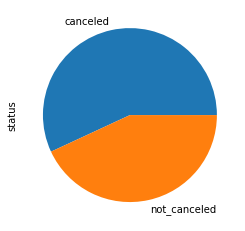

In [8]:
tv_shows_canceled_sample.status.value_counts().plot(kind='pie')

In [9]:
import logging
import matplotlib.pyplot as plt
import mlflow
import optuna
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from urllib.parse import urlparse

logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)

In [10]:
x_tvshows = tv_shows_canceled_sample.drop('status', axis=1)
y_tvshows = tv_shows_canceled_sample['status']
Xtrain, Xtest, ytrain, ytest = train_test_split(x_tvshows, y_tvshows, random_state=1)
# tv_shows_canceled_sample.info()

In [11]:
def show_confusion_matrix (model):
    model.fit(Xtrain, ytrain)
    ypred_train = model.predict(Xtrain)
    y_model = model.predict(Xtest)

    print("ACC TRAINING:" + str(accuracy_score(ytrain, ypred_train)))
    print("ACC TEST:" + str(accuracy_score(ytest, y_model)))

    labels = ['not_canceled', 'canceled']
    mat = confusion_matrix(ytest, y_model, labels=labels)
    sns.heatmap(mat, square=True, annot=True, cbar=False, xticklabels=labels, yticklabels=labels)
    
    plt.xlabel('predicted value')
    plt.ylabel('true value')


## KNN

In [13]:
def objective(trial):
    with mlflow.start_run(run_name="KNN"):

        # hyperparameter setting
        n_neighbors = trial.suggest_int('n_neighbors', 1, 200)
        
        # model training and evaluation
        model =  KNeighborsClassifier(n_neighbors=n_neighbors)
        scores = cross_val_score(model, Xtrain, ytrain, scoring='accuracy', cv=10)

        mlflow.log_param('n_neighbors', n_neighbors)
        mlflow.log_metric('acc', scores.mean())

        tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

        # Model registry does not work with file store
        if tracking_url_type_store != "file":
            mlflow.sklearn.log_model(model, "model", registered_model_name="KNN")
        else:
            mlflow.sklearn.log_model(model, "model")

    # output: evaluation score
    return scores.mean()

study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective, n_trials=20)

[I 2020-11-17 20:54:55,776] A new study created in memory with name: no-name-67b113ae-ef80-4967-b8a1-633eb5305968
[I 2020-11-17 20:54:56,735] Trial 0 finished with value: 0.6563036941580757 and parameters: {'n_neighbors': 149}. Best is trial 0 with value: 0.6563036941580757.
[I 2020-11-17 20:54:56,899] Trial 1 finished with value: 0.6530820446735395 and parameters: {'n_neighbors': 21}. Best is trial 0 with value: 0.6563036941580757.
[I 2020-11-17 20:54:57,136] Trial 2 finished with value: 0.6407431271477663 and parameters: {'n_neighbors': 184}. Best is trial 0 with value: 0.6563036941580757.
[I 2020-11-17 20:54:57,330] Trial 3 finished with value: 0.6427083333333334 and parameters: {'n_neighbors': 92}. Best is trial 0 with value: 0.6563036941580757.
[I 2020-11-17 20:54:57,523] Trial 4 finished with value: 0.6510738831615119 and parameters: {'n_neighbors': 3}. Best is trial 0 with value: 0.6563036941580757.
[I 2020-11-17 20:54:57,707] Trial 5 finished with value: 0.6676439003436426 and 

ACC TRAINING:0.6790890269151139
ACC TEST:0.7080745341614907


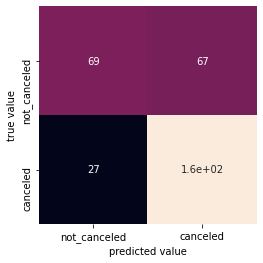

In [14]:
show_confusion_matrix(KNeighborsClassifier(**study_knn.best_params))

## Random Forest

In [15]:
def objective(trial):
    with mlflow.start_run(run_name="RandomForestClassifier"):
        # hyperparameter setting
        max_depth = trial.suggest_int('max_depth', 3, 1000)
        n_estimators = trial.suggest_int('n_estimators', 1, 200)
        
        # model training and evaluation
        model =  RandomForestClassifier(max_depth=max_depth, random_state=112, n_estimators=n_estimators)
        scores = cross_val_score(model, Xtrain, ytrain, scoring='accuracy', cv=10)

        mlflow.log_param('max_depth', max_depth)
        mlflow.log_param('n_estimators', n_estimators)
        mlflow.log_metric('acc', scores.mean())

        tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

        # Model registry does not work with file store
        if tracking_url_type_store != "file":
            mlflow.sklearn.log_model(model, "model", registered_model_name="RandomForestClassifier")
        else:
            mlflow.sklearn.log_model(model, "model")

    # output: evaluation score
    return scores.mean()

study_randomforest = optuna.create_study(direction='maximize')
study_randomforest.optimize(objective, n_trials=20)

[I 2020-11-17 20:55:01,270] A new study created in memory with name: no-name-0a3dbd0c-6055-4df0-9362-79b03386ce2b
[I 2020-11-17 20:55:03,701] Trial 0 finished with value: 0.7173324742268041 and parameters: {'max_depth': 455, 'n_estimators': 110}. Best is trial 0 with value: 0.7173324742268041.
[I 2020-11-17 20:55:05,354] Trial 1 finished with value: 0.7142182130584194 and parameters: {'max_depth': 283, 'n_estimators': 86}. Best is trial 0 with value: 0.7173324742268041.
[I 2020-11-17 20:55:07,295] Trial 2 finished with value: 0.7111254295532647 and parameters: {'max_depth': 931, 'n_estimators': 88}. Best is trial 0 with value: 0.7173324742268041.
[I 2020-11-17 20:55:08,121] Trial 3 finished with value: 0.7132409793814433 and parameters: {'max_depth': 306, 'n_estimators': 36}. Best is trial 0 with value: 0.7173324742268041.
[I 2020-11-17 20:55:08,713] Trial 4 finished with value: 0.700805412371134 and parameters: {'max_depth': 253, 'n_estimators': 25}. Best is trial 0 with value: 0.7173

ACC TRAINING:1.0
ACC TEST:0.7577639751552795


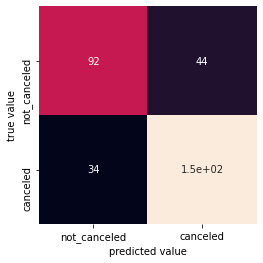

In [16]:
show_confusion_matrix(RandomForestClassifier(**study_randomforest.best_params))

## Naive Bayes

In [17]:
with mlflow.start_run(run_name="NaiveBayes"):
    model = GaussianNB()
    scores = cross_val_score(model, Xtrain, ytrain, scoring='accuracy', cv=10)


    mlflow.log_metric('acc', scores.mean())

    tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

    # Model registry does not work with file store
    if tracking_url_type_store != "file":
        mlflow.sklearn.log_model(model, "model", registered_model_name="NaiveBayes")
    else:
        mlflow.sklearn.log_model(model, "model")

ACC TRAINING:0.6583850931677019
ACC TEST:0.6521739130434783


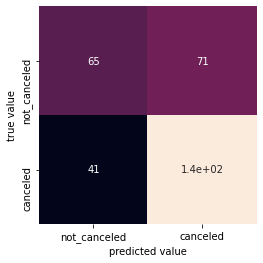

In [18]:
show_confusion_matrix(GaussianNB())

## Decision Tree

In [19]:
def objective(trial):
    with mlflow.start_run(run_name="DecisionTree"):
        # hyperparameter setting
        max_depth = trial.suggest_int('max_depth', 3, 1000)
        
        # model training and evaluation
        model = sklearn.tree.DecisionTreeClassifier(max_depth=max_depth)
        scores = cross_val_score(model, Xtrain, ytrain, scoring='accuracy', cv=10)

        mlflow.log_param('max_depth', max_depth)
        mlflow.log_metric('acc', scores.mean())
        
        tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme
        if tracking_url_type_store != "file":
            mlflow.sklearn.log_model(model, "model", registered_model_name="DecisionTree")
        else:
            mlflow.sklearn.log_model(model, "model")

    # output: evaluation score
    return scores.mean()

study_decisiontree = optuna.create_study(direction='maximize')
study_decisiontree.optimize(objective, n_trials=20)



[I 2020-11-17 20:55:56,361] A new study created in memory with name: no-name-3f6d3d2d-52a5-47a8-a450-491d1ea93c6e
[I 2020-11-17 20:55:56,511] Trial 0 finished with value: 0.663477233676976 and parameters: {'max_depth': 610}. Best is trial 0 with value: 0.663477233676976.
[I 2020-11-17 20:55:56,650] Trial 1 finished with value: 0.6365335051546392 and parameters: {'max_depth': 349}. Best is trial 0 with value: 0.663477233676976.
[I 2020-11-17 20:55:56,779] Trial 2 finished with value: 0.6479810996563573 and parameters: {'max_depth': 168}. Best is trial 0 with value: 0.663477233676976.
[I 2020-11-17 20:55:56,911] Trial 3 finished with value: 0.6510309278350516 and parameters: {'max_depth': 645}. Best is trial 0 with value: 0.663477233676976.
[I 2020-11-17 20:55:57,032] Trial 4 finished with value: 0.6666022336769759 and parameters: {'max_depth': 751}. Best is trial 4 with value: 0.6666022336769759.
[I 2020-11-17 20:55:57,152] Trial 5 finished with value: 0.6541451890034364 and parameters:

ACC TRAINING:1.0
ACC TEST:0.7298136645962733


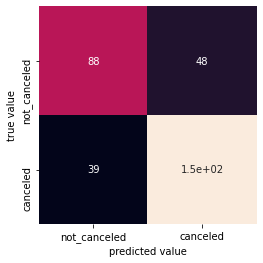

In [20]:
show_confusion_matrix(sklearn.tree.DecisionTreeClassifier(**study_decisiontree.best_params))